<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#U-defaults-frontal-vs-lateral" data-toc-modified-id="U-defaults-frontal-vs-lateral-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>U-defaults frontal vs lateral</a></span></li><li><span><a href="#U-default-smoothing-frontal-and-lateral" data-toc-modified-id="U-default-smoothing-frontal-and-lateral-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>U-default-smoothing frontal and lateral</a></span></li></ul></div>

In [1]:
# Load lib and define helper functions

%reload_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

# from libauc.losses import AUCMLoss, CrossEntropyLoss, AUCM_MultiLabel
# from libauc.optimizers import PESG, Adam
# from libauc.models import DenseNet121, DenseNet169
# import torch 
# from PIL import Image
# import numpy as np
# import torchvision.transforms as transforms
# from torch.utils.data import Dataset
# from sklearn.metrics import roc_auc_score
# import pandas as pd
# from tqdm import tqdm
# from tqdm import tqdm_notebook

from dataloader import *
from trainer import *
import AUCMMS
from fastai.vision.all import *

DATA = '/media/samsung/chexpert/CheXpert-v1.0-small/'

# U-defaults frontal vs lateral

In [4]:
data_params={
    'uncertainty_method':'default',
    'use_frontal':False,
    'image_size':224,
    'sample_frac':1,
    'sample_seed':123,
    'batch_size': 128,
}
SEED = 123
WEIGHT_DECAY = 1e-5
LR = 3.3e-4
N_EPOCHS=4

trainloader,testloader,_ = create_loaders(**data_params)
fastai_loader = DataLoaders(trainloader,testloader)

/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


Multi-label mode: True, Number of classes: [5]
Multi-label mode: True, Number of classes: [5]


/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0-small/', '')
/home/quan/kwon/OMSCS/deep_learning/chestx_interpretation/dataloader.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['Path'] = self.df['Path'].str.replace('CheXpert-v1.0/', '')


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.386592,0.445832,0.880140,[0.84496753 0.81560064 0.90547264 0.91263962 0.92202163],07:49
1,0.381658,0.452959,0.888080,[0.85413961 0.83424876 0.92605156 0.90058789 0.92537313],07:47
2,0.365032,0.423785,0.896416,[0.84261364 0.83765946 0.93102668 0.94156379 0.92921619],07:56
3,0.357157,0.428209,0.885594,[0.82228084 0.8065202 0.93155435 0.93544974 0.93216552],07:48


/home/quan/anaconda3/envs/fastai_v2/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Better model found at epoch 0 with roc_auc_score value: 0.8801404118529417.


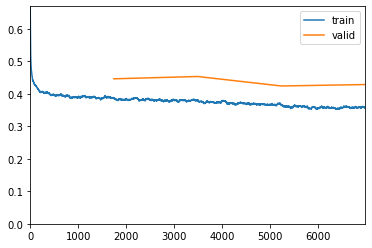

Better model found at epoch 1 with roc_auc_score value: 0.8880801908639053.
Better model found at epoch 2 with roc_auc_score value: 0.8964159525963049.


In [5]:
WEIGHT_NAME='densenet_bce_udefault_fit_fandl'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=False)

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.389514,0.540863,0.846856,[0.79784903 0.78880227 0.8361978 0.9143445 0.89708642],08:01
1,0.383399,0.433810,0.887213,[0.853125 0.83566619 0.92348862 0.8984127 0.92537313],08:11


Better model found at epoch 0 with roc_auc_score value: 0.8468560040306972.


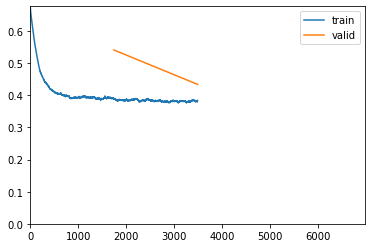

Better model found at epoch 1 with roc_auc_score value: 0.8872131288896087.


In [ ]:
WEIGHT_NAME='densenet_bce_udefault_fit_1cycle_fandl'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=True)

# U-default-smoothing frontal and lateral

In [ ]:
data_params={
    'uncertainty_method':'default-smoothing',
    'use_frontal':False,
    'image_size':224,
    'sample_frac':1,
    'sample_seed':123,
    'batch_size': 128
}
SEED = 123
WEIGHT_DECAY = 1e-5
LR = 3.3e-4
N_EPOCHS=4

In [ ]:
trainloader,testloader,_ = create_loaders(**data_params)
fastai_loader = DataLoaders(trainloader,testloader)

In [ ]:
WEIGHT_NAME='densenet_bce_udefaultsmooth_fit_fandl'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=False)

In [ ]:
WEIGHT_NAME='densenet_bce_udefaultsmooth_fit_1cycle_fandl'
model = get_densenet_model(SEED)
loss,opt = get_loss_and_optimizer(model,LR,loss_type='bce',use_fastai=True,weight_decay=WEIGHT_DECAY)
train_fastai_learner(fastai_loader,model,loss,opt,LR,n_epochs=N_EPOCHS,weight_name=WEIGHT_NAME,use_1cycle=True)